# Experiment Setup 
Create util Functions 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
# -----------------------------------util --------------------------------
def generate_linear(n=100):
    import numpy as np 
    pts = np.random.uniform(0, 1, (n,2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    import numpy as np 
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        if 0.1*i == 0.5:
            continue 
        
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)

    return np.array(inputs), np.array(labels).reshape(21, 1)

# x,y = generate_linear(n=100)
# x,y = generate_XOR_easy()

def show_result(x, y, pred_y):
    import matplotlib.pyplot as plt
    plt.subplot(1, 2, 1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        plt.plot(x[i][0], x[i][1], 'ro' if pred_y[i] < 0.5 else 'bo')
    
    plt.show()


def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

# Define the structure of the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        # Create the weight sturcture 
        self.W1 = np.random.randn(input_size, hidden_size1)
        self.W2 = np.random.randn(hidden_size1, hidden_size2)
        self.W3 = np.random.randn(hidden_size2, output_size)

    def forward(self, X):
        # Forward Process dot product 
        self.Z1 = sigmoid(np.dot(X, self.W1))
        self.Z2 = sigmoid(np.dot(self.Z1, self.W2))
        self.y_hat = sigmoid(np.dot(self.Z2, self.W3))
        return self.y_hat

    def backward(self, X, y, learning_rate):
        self.error = y - self.y_hat
        # weight 3 back prop
        self.delta3 = self.error * derivative_sigmoid(self.y_hat)
        self.dW3 = np.dot(self.Z2.T, self.delta3)
        # weight 2 back prop
        self.delta2 = np.dot(self.delta3, self.W3.T) * derivative_sigmoid(self.Z2)
        self.dW2 = np.dot(self.Z1.T, self.delta2)
        # weight 1 back prop
        self.delta1 = np.dot(self.delta2, self.W2.T) * derivative_sigmoid(self.Z1)
        self.dW1 = np.dot(X.T, self.delta1)
        # update weight 
        self.W3 += learning_rate * self.dW3
        self.W2 += learning_rate * self.dW2
        self.W1 += learning_rate * self.dW1

# train 
def train(X, y, nn, epochs, learning_rate):
    losses = []
    for epoch in range(epochs):
        y_hat = nn.forward(X)
        loss = np.mean((y - y_hat) ** 2)
        losses.append(loss)
        #　update weight
        nn.backward(X, y, learning_rate)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    return losses

# test 
def test(X, y, nn):
    y_hat = nn.forward(X)
    correct = np.sum((y_hat > 0.5) == y)
    accuracy = correct / y.shape[0] * 100
    loss = np.mean((y - y_hat) ** 2)
    
    for i in range(X.shape[0]):
        print(f"Iter {i} |   Ground Truth: {y[i][0]}.0 |    Prediction: {round(y_hat[i][0],8)} |")
    
    print(f"loss= {loss} accuracy ={accuracy}%")
    return y_hat


# Results of your testing
Implementation 1 

Epoch 0, Loss: 0.2372677484890562
Epoch 100, Loss: 0.03126647039078426
Epoch 200, Loss: 0.013315356625502815
Epoch 300, Loss: 0.008619734252212267
Epoch 400, Loss: 0.00645132047415706
Epoch 500, Loss: 0.00516187779918956
Epoch 600, Loss: 0.004284328776455042
Epoch 700, Loss: 0.0036384957376442515
Epoch 800, Loss: 0.003139477022640145
Epoch 900, Loss: 0.0027412572682223363
Epoch 1000, Loss: 0.0024162111617197033
Epoch 1100, Loss: 0.0021464332961856586
Epoch 1200, Loss: 0.0019196241689736417
Epoch 1300, Loss: 0.0017269522908032744
Epoch 1400, Loss: 0.0015618571444874843
Epoch 1500, Loss: 0.001419335505514231
Epoch 1600, Loss: 0.0012954925635459157
Epoch 1700, Loss: 0.001187246423580198
Epoch 1800, Loss: 0.001092125923420934
Epoch 1900, Loss: 0.001008127750030752
Epoch 2000, Loss: 0.0009336127102596124
Epoch 2100, Loss: 0.00086722873241259
Epoch 2200, Loss: 0.0008078526487478307
Epoch 2300, Loss: 0.0007545454998155104
Epoch 2400, Loss: 0.0007065177773579269
Epoch 2500, Loss: 0.00066310210

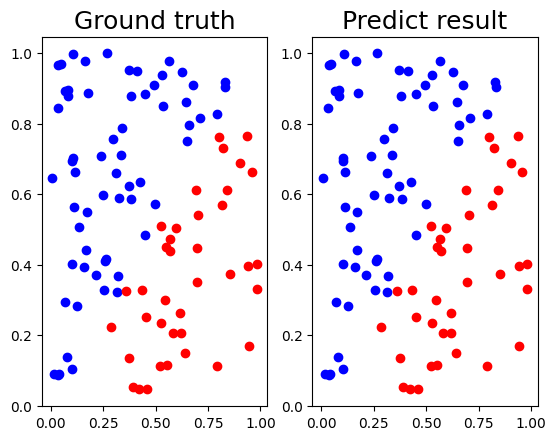

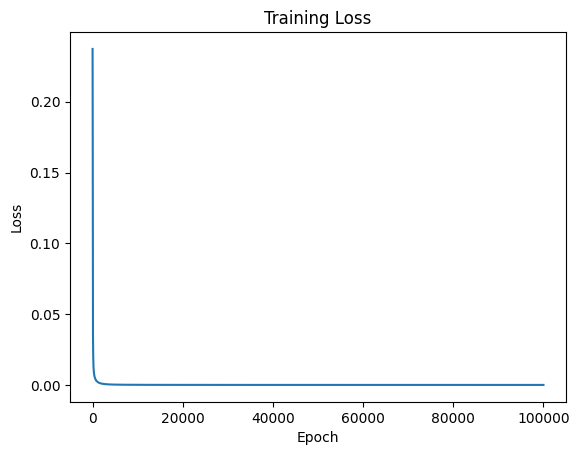

In [2]:

# -----------------------------------Implementation1 --------------------------------
# Generate data
X, y = generate_linear(n=100)

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size1=5, hidden_size2=5, output_size=1)
losses = train(X, y, nn, epochs=100000, learning_rate=0.1)

# Test the neural network and print results
pred_y = test(X, y, nn)

# Show results
show_result(X, y, np.round(pred_y))

# Plot training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Results of your testing
Implementation 2

Epoch 0, Loss: 0.3138158473665639
Epoch 100, Loss: 0.2481634319204637
Epoch 200, Loss: 0.24733760612261538
Epoch 300, Loss: 0.24623256482120487
Epoch 400, Loss: 0.24461546410040721
Epoch 500, Loss: 0.2420944616497247
Epoch 600, Loss: 0.23809240074934107
Epoch 700, Loss: 0.2320324255789937
Epoch 800, Loss: 0.22384939876202298
Epoch 900, Loss: 0.21403229084240966
Epoch 1000, Loss: 0.20209638869981209
Epoch 1100, Loss: 0.18395268111031446
Epoch 1200, Loss: 0.14647681931823936
Epoch 1300, Loss: 0.09791723318483513
Epoch 1400, Loss: 0.06488868947905069
Epoch 1500, Loss: 0.04394636228087231
Epoch 1600, Loss: 0.03024479205844802
Epoch 1700, Loss: 0.021309390887622747
Epoch 1800, Loss: 0.015524326658463103
Epoch 1900, Loss: 0.011734657303126365
Epoch 2000, Loss: 0.009183461144920984
Epoch 2100, Loss: 0.0074074769727153185
Epoch 2200, Loss: 0.006128921163515841
Epoch 2300, Loss: 0.005179582371155046
Epoch 2400, Loss: 0.0044551227651461345
Epoch 2500, Loss: 0.003888912025990901
Epoch 2600, Loss:

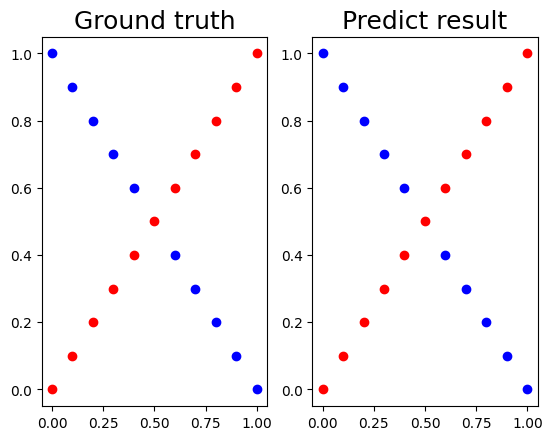

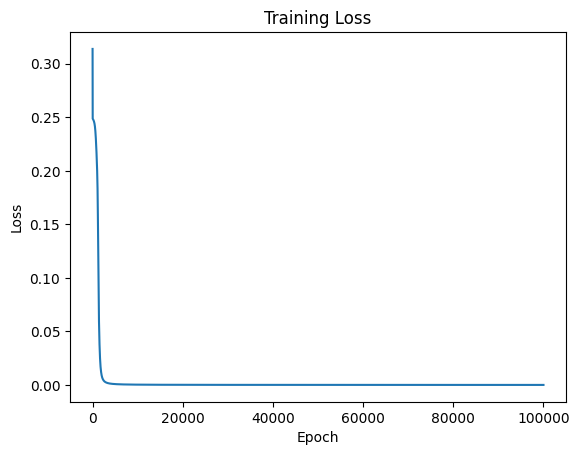

In [3]:
# -----------------------------------Implementation2 --------------------------------
# Generate data
X, y = generate_XOR_easy()

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size1=5, hidden_size2=5, output_size=1)
losses = train(X, y, nn, epochs=100000, learning_rate=0.1)

# Test the neural network and print results
pred_y = test(X, y, nn)

# Show results
show_result(X, y, np.round(pred_y))

# Plot training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Discussion
Testing different learning rates and numbers of hidden units

Evaluating different learning rates:

Learning rate: 0.01
Epoch 0, Loss: 0.3653065599641895
Epoch 100, Loss: 0.23709680317592233
Epoch 200, Loss: 0.2208890746781309
Epoch 300, Loss: 0.1906668446830314
Epoch 400, Loss: 0.14461285290993525
Epoch 500, Loss: 0.10336828589559001
Epoch 600, Loss: 0.07741247466957339
Epoch 700, Loss: 0.06143260675118041
Epoch 800, Loss: 0.05089100434753722
Epoch 900, Loss: 0.04344883371738458
Epoch 1000, Loss: 0.03791163669755558
Epoch 1100, Loss: 0.03363212266515177
Epoch 1200, Loss: 0.030231036487845468
Epoch 1300, Loss: 0.02746946815359816
Epoch 1400, Loss: 0.02518809252299849
Epoch 1500, Loss: 0.02327600271007122
Epoch 1600, Loss: 0.021653420404133955
Epoch 1700, Loss: 0.02026145507746246
Epoch 1800, Loss: 0.019055715473240573
Epoch 1900, Loss: 0.01800215471991036
Epoch 2000, Loss: 0.017074274046893094
Epoch 2100, Loss: 0.016251186521396115
Epoch 2200, Loss: 0.01551624397855968
Epoch 2300, Loss: 0.014856043611831245
Epoch 2400, Loss: 0.014259696919820368


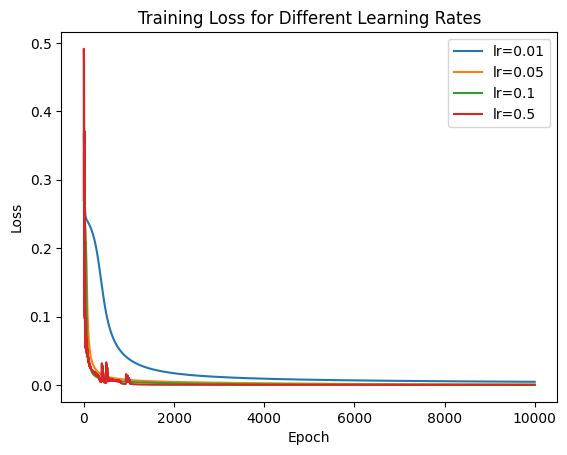

Evaluating different numbers of hidden units:

Hidden units: 3, 3
Epoch 0, Loss: 0.4182159193310373
Epoch 100, Loss: 0.04053578162930557
Epoch 200, Loss: 0.017134364446763358
Epoch 300, Loss: 0.0116914642941481
Epoch 400, Loss: 0.009166074198074508
Epoch 500, Loss: 0.0076660256217957615
Epoch 600, Loss: 0.0066577795873953485
Epoch 700, Loss: 0.005925885632086834
Epoch 800, Loss: 0.0053646644215946185
Epoch 900, Loss: 0.004915777101767647
Epoch 1000, Loss: 0.004544368817622521
Epoch 1100, Loss: 0.0042284034419294856
Epoch 1200, Loss: 0.003953354652139691
Epoch 1300, Loss: 0.0037093466327394143
Epoch 1400, Loss: 0.003489514588526865
Epoch 1500, Loss: 0.003289012423459119
Epoch 1600, Loss: 0.0031043817765874305
Epoch 1700, Loss: 0.0029331327268310348
Epoch 1800, Loss: 0.0027734550711908564
Epoch 1900, Loss: 0.0026240147957626143
Epoch 2000, Loss: 0.002483809117255048
Epoch 2100, Loss: 0.0023520633540156507
Epoch 2200, Loss: 0.0022281582427543883
Epoch 2300, Loss: 0.0021115794676657453
Epo

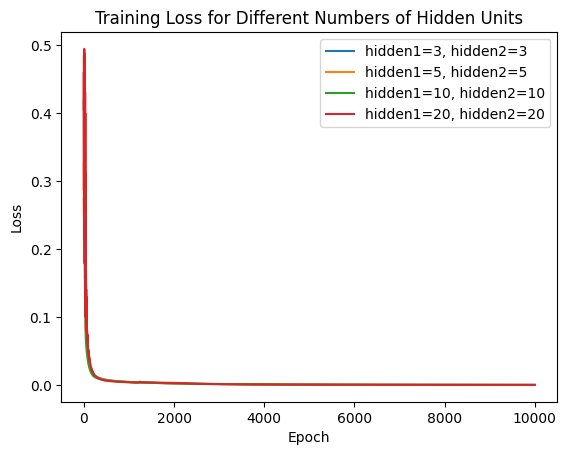

Evaluating different learning rates on XOR dataset:

Learning rate: 0.01
Epoch 0, Loss: 0.24837454941645512
Epoch 100, Loss: 0.24651180433285907
Epoch 200, Loss: 0.24630544749021416
Epoch 300, Loss: 0.2461109847589194
Epoch 400, Loss: 0.24590744657723293
Epoch 500, Loss: 0.24569402904946494
Epoch 600, Loss: 0.24547017506712937
Epoch 700, Loss: 0.24523533784432983
Epoch 800, Loss: 0.2449889811709736
Epoch 900, Loss: 0.24473058301166534
Epoch 1000, Loss: 0.24445963945466526
Epoch 1100, Loss: 0.2441756688830356
Epoch 1200, Loss: 0.2438782162787383
Epoch 1300, Loss: 0.24356685756044827
Epoch 1400, Loss: 0.24324120384516906
Epoch 1500, Loss: 0.2429009055154681
Epoch 1600, Loss: 0.24254565596928654
Epoch 1700, Loss: 0.24217519492856143
Epoch 1800, Loss: 0.24178931118681576
Epoch 1900, Loss: 0.24138784468475946
Epoch 2000, Loss: 0.24097068781683337
Epoch 2100, Loss: 0.24053778589028604
Epoch 2200, Loss: 0.2400891366812996
Epoch 2300, Loss: 0.23962478905906653
Epoch 2400, Loss: 0.2391448406775

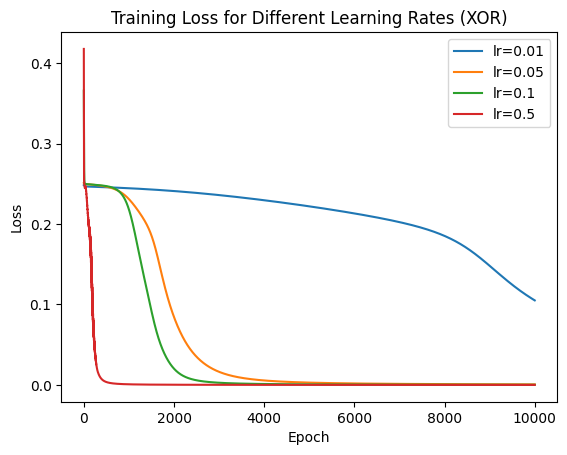

Evaluating different numbers of hidden units on XOR dataset:

Hidden units: 3, 3
Epoch 0, Loss: 0.26133808954518967
Epoch 100, Loss: 0.24908316295333394
Epoch 200, Loss: 0.24894443938890426
Epoch 300, Loss: 0.24876481170348838
Epoch 400, Loss: 0.24852323236480087
Epoch 500, Loss: 0.24818848886557493
Epoch 600, Loss: 0.24771413129756406
Epoch 700, Loss: 0.24703255189077997
Epoch 800, Loss: 0.2460514908533069
Epoch 900, Loss: 0.24466200072002145
Epoch 1000, Loss: 0.2427709658778439
Epoch 1100, Loss: 0.24035398083662404
Epoch 1200, Loss: 0.23747983680071627
Epoch 1300, Loss: 0.23425940183947436
Epoch 1400, Loss: 0.23075660025120892
Epoch 1500, Loss: 0.2269273435702422
Epoch 1600, Loss: 0.22256113915197773
Epoch 1700, Loss: 0.21710731876583236
Epoch 1800, Loss: 0.2096342603763239
Epoch 1900, Loss: 0.1988868739620694
Epoch 2000, Loss: 0.17906205177195153
Epoch 2100, Loss: 0.14193075114639653
Epoch 2200, Loss: 0.10579110341551015
Epoch 2300, Loss: 0.08227848996156276
Epoch 2400, Loss: 0.0670

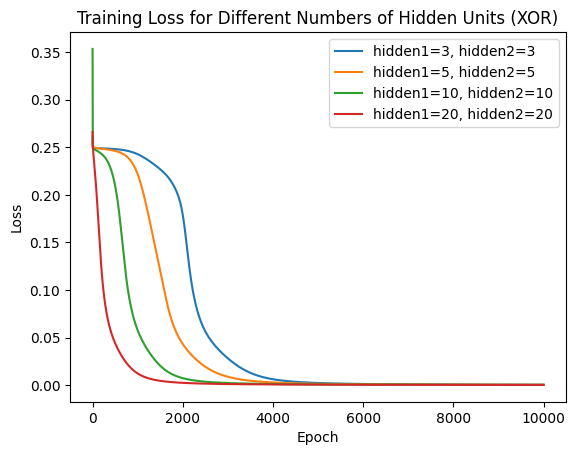

In [4]:
# Updated show_result function to handle plotting
def plot_results(title, xlabel, ylabel, legends, data):
    for i, d in enumerate(data):
        plt.plot(d, label=legends[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Utility function to perform training and testing with different parameters
def evaluate_nn(X, y, hidden_size1, hidden_size2, learning_rate, epochs=10000):
    nn = NeuralNetwork(input_size=2, hidden_size1=hidden_size1, hidden_size2=hidden_size2, output_size=1)
    losses = train(X, y, nn, epochs=epochs, learning_rate=learning_rate)
    pred_y = test(X, y, nn)
    # show_result(X, y, pred_y)  # This can be kept to show individual results if needed
    return losses

# Generate data
X, y = generate_linear(n=100)

# Different learning rates to try
learning_rates = [0.01, 0.05, 0.1, 0.5]
losses_lr = []

print("Evaluating different learning rates:")
for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    losses = evaluate_nn(X, y, hidden_size1=5, hidden_size2=5, learning_rate=lr, epochs=10000)
    losses_lr.append(losses)

plot_results(
    title='Training Loss for Different Learning Rates',
    xlabel='Epoch',
    ylabel='Loss',
    legends=[f'lr={lr}' for lr in learning_rates],
    data=losses_lr
)

# Different numbers of hidden units to try
hidden_units = [(3, 3), (5, 5), (10, 10), (20, 20)]
losses_hidden_units = []

print("Evaluating different numbers of hidden units:")
for h1, h2 in hidden_units:
    print(f"\nHidden units: {h1}, {h2}")
    losses = evaluate_nn(X, y, hidden_size1=h1, hidden_size2=h2, learning_rate=0.1, epochs=10000)
    losses_hidden_units.append(losses)

plot_results(
    title='Training Loss for Different Numbers of Hidden Units',
    xlabel='Epoch',
    ylabel='Loss',
    legends=[f'hidden1={h1}, hidden2={h2}' for h1, h2 in hidden_units],
    data=losses_hidden_units
)

# Generate data for XOR
X, y = generate_XOR_easy()
losses_lr_XOR = []

print("Evaluating different learning rates on XOR dataset:")
for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    losses = evaluate_nn(X, y, hidden_size1=5, hidden_size2=5, learning_rate=lr, epochs=10000)
    losses_lr_XOR.append(losses)

plot_results(
    title='Training Loss for Different Learning Rates (XOR)',
    xlabel='Epoch',
    ylabel='Loss',
    legends=[f'lr={lr}' for lr in learning_rates],
    data=losses_lr_XOR
)

losses_hidden_units_XOR = []

print("Evaluating different numbers of hidden units on XOR dataset:")
for h1, h2 in hidden_units:
    print(f"\nHidden units: {h1}, {h2}")
    losses = evaluate_nn(X, y, hidden_size1=h1, hidden_size2=h2, learning_rate=0.1, epochs=10000)
    losses_hidden_units_XOR.append(losses)

plot_results(
    title='Training Loss for Different Numbers of Hidden Units (XOR)',
    xlabel='Epoch',
    ylabel='Loss',
    legends=[f'hidden1={h1}, hidden2={h2}' for h1, h2 in hidden_units],
    data=losses_hidden_units_XOR
)


# Discussion
Try without Activation Functions

Epoch 0, Loss: 0.3900014378154004
Epoch 100, Loss: 0.3899904748405196
Epoch 200, Loss: 0.3885923426881482
Epoch 300, Loss: 0.09542922275533275
Epoch 400, Loss: 0.09542922275533261
Epoch 500, Loss: 0.09542922275533261
Epoch 600, Loss: 0.09542922275533261
Epoch 700, Loss: 0.09542922275533261
Epoch 800, Loss: 0.09542922275533261
Epoch 900, Loss: 0.09542922275533261
Epoch 1000, Loss: 0.09542922275533261
Epoch 1100, Loss: 0.09542922275533261
Epoch 1200, Loss: 0.09542922275533261
Epoch 1300, Loss: 0.09542922275533261
Epoch 1400, Loss: 0.09542922275533261
Epoch 1500, Loss: 0.09542922275533261
Epoch 1600, Loss: 0.09542922275533261
Epoch 1700, Loss: 0.09542922275533261
Epoch 1800, Loss: 0.09542922275533261
Epoch 1900, Loss: 0.09542922275533261
Epoch 2000, Loss: 0.09542922275533261
Epoch 2100, Loss: 0.09542922275533261
Epoch 2200, Loss: 0.09542922275533261
Epoch 2300, Loss: 0.09542922275533261
Epoch 2400, Loss: 0.09542922275533261
Epoch 2500, Loss: 0.09542922275533261
Epoch 2600, Loss: 0.0954292

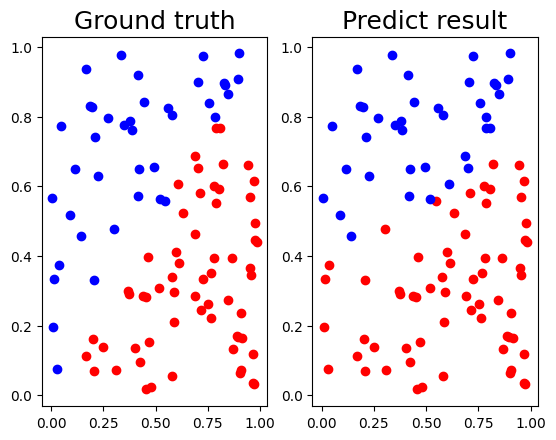

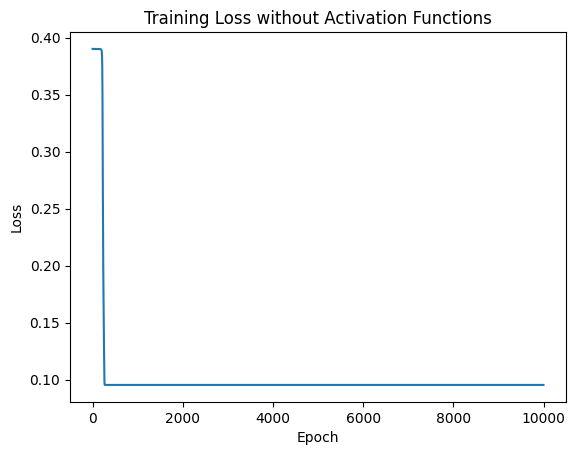

Epoch 0, Loss: 0.47618840170958504
Epoch 100, Loss: 0.47617371400830616
Epoch 200, Loss: 0.4761421016609764
Epoch 300, Loss: 0.4760332205637119
Epoch 400, Loss: 0.4752864958223357
Epoch 500, Loss: 0.4217470767963243
Epoch 600, Loss: 0.2887139246374462
Epoch 700, Loss: 0.2887139125970443
Epoch 800, Loss: 0.2887139110040506
Epoch 900, Loss: 0.288713910793291
Epoch 1000, Loss: 0.28871391076540664
Epoch 1100, Loss: 0.28871391076171743
Epoch 1200, Loss: 0.28871391076122926
Epoch 1300, Loss: 0.2887139107611647
Epoch 1400, Loss: 0.2887139107611562
Epoch 1500, Loss: 0.28871391076115505
Epoch 1600, Loss: 0.28871391076115493
Epoch 1700, Loss: 0.28871391076115493
Epoch 1800, Loss: 0.2887139107611548
Epoch 1900, Loss: 0.2887139107611548
Epoch 2000, Loss: 0.2887139107611549
Epoch 2100, Loss: 0.2887139107611548
Epoch 2200, Loss: 0.2887139107611549
Epoch 2300, Loss: 0.2887139107611548
Epoch 2400, Loss: 0.2887139107611548
Epoch 2500, Loss: 0.2887139107611549
Epoch 2600, Loss: 0.2887139107611548
Epoch 

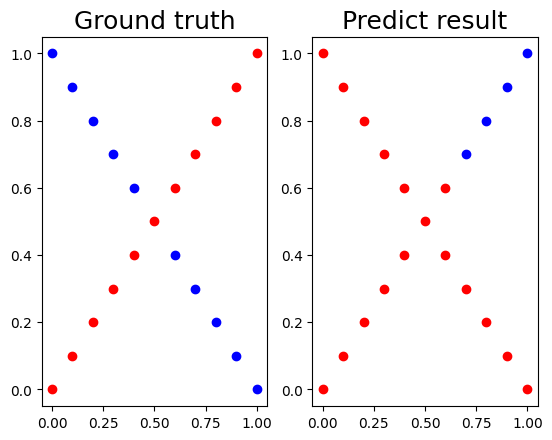

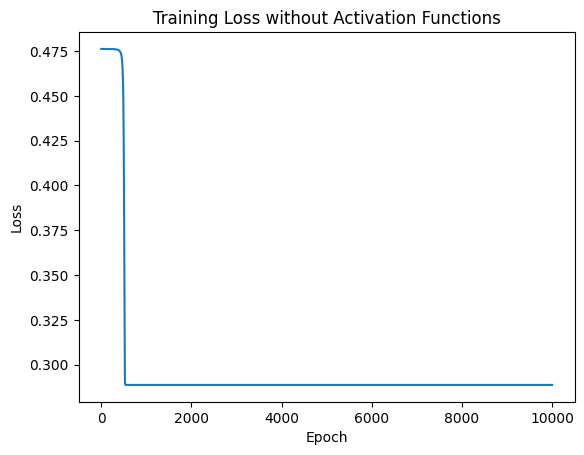

In [5]:
class NeuralNetworkNoActivation:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        # If without activation, initial weight should not be large or might cause error 
        self.W1 = np.random.randn(input_size, hidden_size1) * 0.01
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
        self.W3 = np.random.randn(hidden_size2, output_size) * 0.01

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1)
        self.Z2 = np.dot(self.Z1, self.W2)
        self.y_hat = np.dot(self.Z2, self.W3)
        return self.y_hat

    def backward(self, X, y, learning_rate):
        self.error = y - self.y_hat
        self.delta3 = self.error
        # backward without deravitive of sigmoid 
        self.dW3 = np.dot(self.Z2.T, self.delta3)
        self.delta2 = np.dot(self.delta3, self.W3.T)
        self.dW2 = np.dot(self.Z1.T, self.delta2)
        self.delta1 = np.dot(self.delta2, self.W2.T)
        self.dW1 = np.dot(X.T, self.delta1)

        # Clip the gradients during backpropagation to prevent them from becoming too large.
        max_grad = 1.0
        self.dW3 = np.clip(self.dW3, -max_grad, max_grad)
        self.dW2 = np.clip(self.dW2, -max_grad, max_grad)
        self.dW1 = np.clip(self.dW1, -max_grad, max_grad)

        self.W3 += learning_rate * self.dW3
        self.W2 += learning_rate * self.dW2
        self.W1 += learning_rate * self.dW1

def train(X, y, nn, epochs, learning_rate):
    losses = []
    for epoch in range(epochs):
        y_hat = nn.forward(X)
        loss = np.mean((y - y_hat) ** 2)
        if np.isnan(loss):
            print(f"NaN detected at epoch {epoch}")
            break
        losses.append(loss)
        nn.backward(X, y, learning_rate)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    return losses

def test(X, y, nn):
    y_hat = nn.forward(X)
    correct = np.sum((y_hat > 0.5) == y)
    accuracy = correct / y.shape[0] * 100
    loss = np.mean((y - y_hat) ** 2)

    for i in range(X.shape[0]):
        print(f"Iter {i} |   Ground Truth: {y[i][0]} |    Prediction: {round(y_hat[i][0], 8)} |")

    print(f"Final Loss: {loss}, Accuracy: {accuracy}%")
    return y_hat

def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        plt.plot(x[i][0], x[i][1], 'ro' if pred_y[i] < 0.5 else 'bo')

    plt.show()

# Generate data
X, y = generate_linear(n=100)

# Initialize and train the neural network without activation functions
nn_no_activation = NeuralNetworkNoActivation(input_size=2, hidden_size1=5, hidden_size2=5, output_size=1)
losses_no_activation = train(X, y, nn_no_activation, epochs=10000, learning_rate=0.01)

# Test the neural network without activation functions and print results
pred_y_no_activation = test(X, y, nn_no_activation)

# Show results
show_result(X, y, pred_y_no_activation)

# Plot training loss
plt.plot(losses_no_activation)
plt.title('Training Loss without Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Generate data
X, y = generate_XOR_easy()

# Initialize and train the neural network without activation functions
nn_no_activation = NeuralNetworkNoActivation(input_size=2, hidden_size1=5, hidden_size2=5, output_size=1)
losses_no_activation = train(X, y, nn_no_activation, epochs=10000, learning_rate=0.01)

# Test the neural network without activation functions and print results
pred_y_no_activation = test(X, y, nn_no_activation)

# Show results
show_result(X, y, pred_y_no_activation)

# Plot training loss
plt.plot(losses_no_activation)
plt.title('Training Loss without Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Extra 
Implement Different Optimizers and Implement different activation functions.

Evaluating different optimizers:

Optimizer: sgd
Epoch 0, Loss: 0.25093274595052023
Epoch 100, Loss: 0.2464091224878592
Epoch 200, Loss: 0.24640374208374388
Epoch 300, Loss: 0.24639863177368068
Epoch 400, Loss: 0.24639364776094047
Epoch 500, Loss: 0.2463886557666302
Epoch 600, Loss: 0.24638352441905936
Epoch 700, Loss: 0.24637811905710763
Epoch 800, Loss: 0.24637229531895824
Epoch 900, Loss: 0.2463658919811385
Epoch 1000, Loss: 0.2463587224202541
Epoch 1100, Loss: 0.24635056389110788
Epoch 1200, Loss: 0.24634114351653771
Epoch 1300, Loss: 0.2463301194071054
Epoch 1400, Loss: 0.2463170545716376
Epoch 1500, Loss: 0.24630138006999047
Epoch 1600, Loss: 0.24628234189850054
Epoch 1700, Loss: 0.2462589228586335
Epoch 1800, Loss: 0.24622972518492162
Epoch 1900, Loss: 0.24619279022155208
Epoch 2000, Loss: 0.24614531452603203
Epoch 2100, Loss: 0.24608319066704848
Epoch 2200, Loss: 0.24600024168816312
Epoch 2300, Loss: 0.2458869006000205
Epoch 2400, Loss: 0.24572784217443247
Epoch 2500, Loss: 0.2

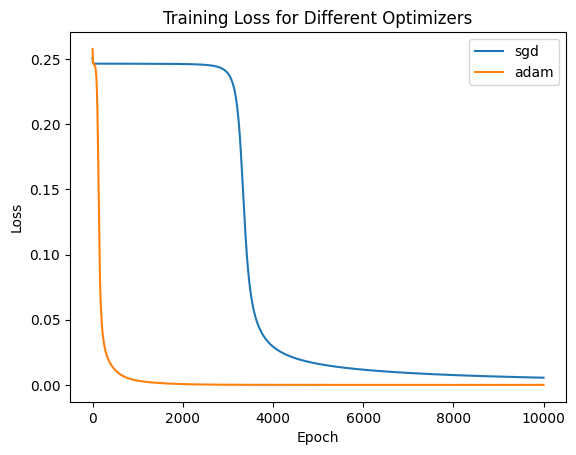

Evaluating different activation functions:

Activation: sigmoid
Epoch 0, Loss: 0.24855668788143867
Epoch 100, Loss: 0.24639970499846175
Epoch 200, Loss: 0.24639319278316088
Epoch 300, Loss: 0.246386188171978
Epoch 400, Loss: 0.24637847641031654
Epoch 500, Loss: 0.24636980373568904
Epoch 600, Loss: 0.24635986140594276
Epoch 700, Loss: 0.24634826474907026
Epoch 800, Loss: 0.24633452429974045
Epoch 900, Loss: 0.24631800511392746
Epoch 1000, Loss: 0.2462978682135934
Epoch 1100, Loss: 0.2462729845984151
Epoch 1200, Loss: 0.24624180636985835
Epoch 1300, Loss: 0.24620216941341053
Epoch 1400, Loss: 0.2461509843419236
Epoch 1500, Loss: 0.2460837403923888
Epoch 1600, Loss: 0.2459936875439537
Epoch 1700, Loss: 0.24587044840681094
Epoch 1800, Loss: 0.24569758677685521
Epoch 1900, Loss: 0.24544820131184233
Epoch 2000, Loss: 0.24507664757892988
Epoch 2100, Loss: 0.24450240482549493
Epoch 2200, Loss: 0.24357752249687384
Epoch 2300, Loss: 0.24201910534866555
Epoch 2400, Loss: 0.23926759311678758
Epoch

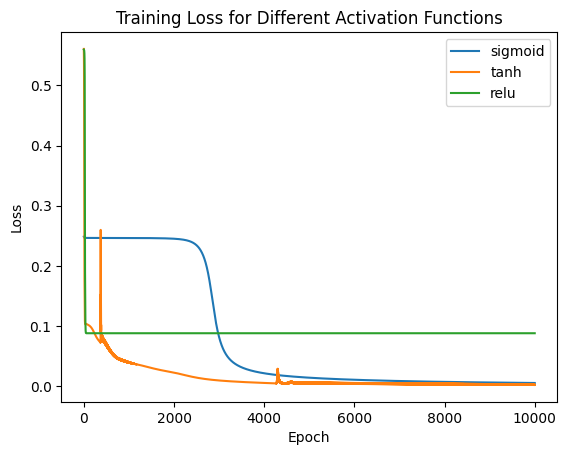

In [6]:
# Activation 
def tanh(x):
    return np.tanh(x)

def derivative_tanh(x):
    return 1.0 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def derivative_relu(x):
    return np.where(x > 0, 1, 0)

# Optimizers
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, weights, gradients):
        for i in range(len(weights)):
            weights[i] += self.learning_rate * gradients[i]

class Adam:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = []
        self.v = []
        self.t = 0

    def update(self, weights, gradients):
        if not self.m:
            self.m = [np.zeros_like(w) for w in weights]
            self.v = [np.zeros_like(w) for w in weights]
        self.t += 1
        for i in range(len(weights)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * gradients[i]
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (gradients[i] ** 2)
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)
            weights[i] += self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# Neural Network with Different Activation Functions and Optimizers
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, activation='sigmoid', optimizer='sgd', learning_rate=0.01):
        self.W1 = np.random.randn(input_size, hidden_size1) * 0.1
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * 0.1
        self.W3 = np.random.randn(hidden_size2, output_size) * 0.1
        self.activation = activation
        self.optimizer_name = optimizer
        if optimizer == 'sgd':
            self.optimizer = SGD(learning_rate)
        elif optimizer == 'adam':
            self.optimizer = Adam(learning_rate)
        self.learning_rate = learning_rate

    def activate(self, x):
        if self.activation == 'sigmoid':
            return sigmoid(x)
        elif self.activation == 'tanh':
            return tanh(x)
        elif self.activation == 'relu':
            return relu(x)

    def activate_derivative(self, x):
        if self.activation == 'sigmoid':
            return derivative_sigmoid(x)
        elif self.activation == 'tanh':
            return derivative_tanh(x)
        elif self.activation == 'relu':
            return derivative_relu(x)

    def forward(self, X):
        self.Z1 = self.activate(np.dot(X, self.W1))
        self.Z2 = self.activate(np.dot(self.Z1, self.W2))
        self.y_hat = self.activate(np.dot(self.Z2, self.W3))
        return self.y_hat

    def backward(self, X, y):
        self.error = y - self.y_hat
        self.delta3 = self.error * self.activate_derivative(self.y_hat)
        self.dW3 = np.dot(self.Z2.T, self.delta3)
        self.delta2 = np.dot(self.delta3, self.W3.T) * self.activate_derivative(self.Z2)
        self.dW2 = np.dot(self.Z1.T, self.delta2)
        self.delta1 = np.dot(self.delta2, self.W2.T) * self.activate_derivative(self.Z1)
        self.dW1 = np.dot(X.T, self.delta1)
        self.optimizer.update([self.W1, self.W2, self.W3], [self.dW1, self.dW2, self.dW3])


def train(X, y, nn, epochs):
    losses = []
    for epoch in range(epochs):
        y_hat = nn.forward(X)
        loss = np.mean((y - y_hat) ** 2)
        if np.isnan(loss):
            print(f"NaN detected at epoch {epoch}")
            break
        losses.append(loss)
        nn.backward(X, y)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    return losses

def test(X, y, nn):
    y_hat = nn.forward(X)
    correct = np.sum((y_hat > 0.5) == y)
    accuracy = correct / y.shape[0] * 100
    loss = np.mean((y - y_hat) ** 2)
    print(f"Final Loss: {loss}, Accuracy: {accuracy}%")
    return y_hat


# Generate data
X, y = generate_linear(n=100)

# Different optimizers to try
optimizers = ['sgd', 'adam']
losses_optimizers = []

print("Evaluating different optimizers:")
for opt in optimizers:
    print(f"\nOptimizer: {opt}")
    nn = NeuralNetwork(input_size=2, hidden_size1=5, hidden_size2=5, output_size=1, optimizer=opt, learning_rate=0.01)
    losses = train(X, y, nn, epochs=10000)
    losses_optimizers.append(losses)
    print(f"Testing with {opt} optimizer:")
    test(X, y, nn)

plot_results(
    title='Training Loss for Different Optimizers',
    xlabel='Epoch',
    ylabel='Loss',
    legends=optimizers,
    data=losses_optimizers
)

# Different activation functions to try
activations = ['sigmoid', 'tanh', 'relu']
losses_activations = []

print("Evaluating different activation functions:")
for act in activations:
    print(f"\nActivation: {act}")
    nn = NeuralNetwork(input_size=2, hidden_size1=5, hidden_size2=5, output_size=1, activation=act, learning_rate=0.01)
    losses = train(X, y, nn, epochs=10000)
    losses_activations.append(losses)
    print(f"Testing with {act} activation:")
    test(X, y, nn)

plot_results(
    title='Training Loss for Different Activation Functions',
    xlabel='Epoch',
    ylabel='Loss',
    legends=activations,
    data=losses_activations
)


# Extra 
Implement convolutional layers

Evaluating different activation functions with convolutional layer:

Activation: sigmoid
Epoch 0, Loss: 0.2586704653224369
Epoch 10, Loss: 0.2519444244380445
Epoch 20, Loss: 0.25047895012761845
Epoch 30, Loss: 0.2501765548355277
Epoch 40, Loss: 0.2501161246776645
Epoch 50, Loss: 0.2501047165879424
Epoch 60, Loss: 0.2501028214863348
Epoch 70, Loss: 0.2501025775403031
Epoch 80, Loss: 0.2501025238442791
Epoch 90, Loss: 0.2501024390360963
Epoch 100, Loss: 0.25010231545893136
Epoch 110, Loss: 0.250102169224154
Epoch 120, Loss: 0.25010201181134395
Epoch 130, Loss: 0.2501018493301419
Epoch 140, Loss: 0.2501016847512143
Epoch 150, Loss: 0.25010151946570486
Epoch 160, Loss: 0.2501013541118525
Epoch 170, Loss: 0.2501011889770067
Epoch 180, Loss: 0.2501010241866026
Epoch 190, Loss: 0.25010085979170155
Epoch 200, Loss: 0.2501006958092807
Epoch 210, Loss: 0.25010053224071976
Epoch 220, Loss: 0.250100369080273
Epoch 230, Loss: 0.2501002063189488
Epoch 240, Loss: 0.2501000439462854
Epoch 250, Loss: 0

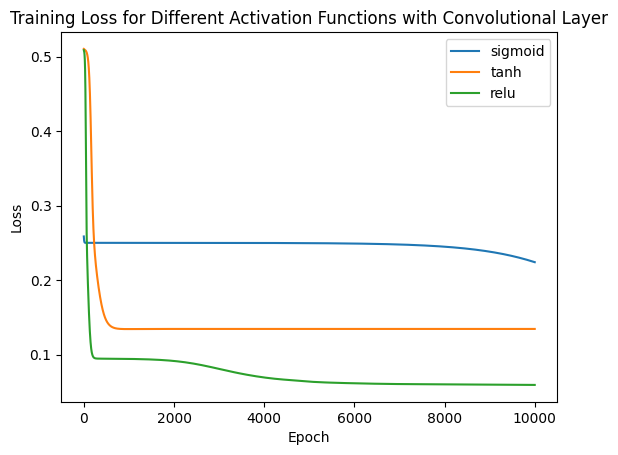

In [7]:
# Convolutional Layer
class ConvLayer:
    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.filters = np.random.randn(num_filters, filter_size, filter_size) * 0.1

    def iterate_regions(self, image):
        h, w = image.shape
        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                img_region = image[i:(i + self.filter_size), j:(j + self.filter_size)]
                yield img_region, i, j

    def forward(self, input):
        self.last_input = input
        h, w = input.shape
        output = np.zeros((h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters))
        for img_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(img_region * self.filters, axis=(1, 2))
        return output

    def backward(self, d_L_d_out, learning_rate):
        d_L_d_filters = np.zeros(self.filters.shape)
        for img_region, i, j in self.iterate_regions(self.last_input):
            for f in range(self.num_filters):
                d_L_d_filters[f] += d_L_d_out[i, j, f] * img_region
        self.filters += learning_rate * d_L_d_filters

# Neural Network with Convolutional Layer
class NeuralNetworkWithConv:
    def __init__(self, input_shape, conv_filter_size, num_filters, hidden_size, output_size, activation='sigmoid', optimizer='sgd', learning_rate=0.01):
        self.conv = ConvLayer(num_filters, conv_filter_size)
        conv_output_size = (input_shape[0] - conv_filter_size + 1, input_shape[1] - conv_filter_size + 1)
        self.W1 = np.random.randn(num_filters * conv_output_size[0] * conv_output_size[1], hidden_size) * 0.1
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.activation = activation
        if optimizer == 'sgd':
            self.optimizer = SGD(learning_rate)
        elif optimizer == 'adam':
            self.optimizer = Adam(learning_rate)
        self.learning_rate = learning_rate

    def activate(self, x):
        if self.activation == 'sigmoid':
            return sigmoid(x)
        elif self.activation == 'tanh':
            return tanh(x)
        elif self.activation == 'relu':
            return relu(x)

    def activate_derivative(self, x):
        if self.activation == 'sigmoid':
            return derivative_sigmoid(x)
        elif self.activation == 'tanh':
            return derivative_tanh(x)
        elif self.activation == 'relu':
            return derivative_relu(x)

    def forward(self, X):
        self.conv_output = self.conv.forward(X)
        self.conv_output_flat = self.conv_output.flatten()
        self.Z1 = self.activate(np.dot(self.conv_output_flat, self.W1))
        self.y_hat = self.activate(np.dot(self.Z1, self.W2))
        return self.y_hat

    def backward(self, X, y):
        self.error = y - self.y_hat
        self.delta2 = self.error * self.activate_derivative(self.y_hat)
        self.dW2 = np.dot(self.Z1.reshape(-1, 1), self.delta2.reshape(1, -1))
        self.delta1 = np.dot(self.delta2, self.W2.T) * self.activate_derivative(self.Z1)
        self.dW1 = np.dot(self.conv_output_flat.reshape(-1, 1), self.delta1.reshape(1, -1))
        self.optimizer.update([self.W1, self.W2], [self.dW1, self.dW2])

def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    inputs = np.array(inputs).reshape(-1, 1, 2)  # Reshape for compatibility with ConvLayer
    return np.array(inputs), np.array(labels).reshape(n, 1)

def train(X, y, nn, epochs):
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            y_hat = nn.forward(X[i])
            loss = np.mean((y[i] - y_hat) ** 2)
            total_loss += loss
            nn.backward(X[i], y[i])
        losses.append(total_loss / len(X))
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {total_loss / len(X)}')
    return losses

def test(X, y, nn):
    correct = 0
    for i in range(len(X)):
        y_hat = nn.forward(X[i])
        if (y_hat > 0.5) == y[i]:
            correct += 1
    accuracy = correct / len(X) * 100
    print(f'Accuracy: {accuracy}%')
    return accuracy

def plot_results(title, xlabel, ylabel, legends, data):
    for i, d in enumerate(data):
        plt.plot(d, label=legends[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Generate data
X, y = generate_linear(n=100)

# Different activation functions to try
activations = ['sigmoid', 'tanh', 'relu']
losses_activations = []

print("Evaluating different activation functions with convolutional layer:")
for act in activations:
    print(f"\nActivation: {act}")
    nn = NeuralNetworkWithConv(input_shape=(1, 2), conv_filter_size=1, num_filters=1, hidden_size=5, output_size=1, activation=act, learning_rate=0.01)
    losses = train(X, y, nn, epochs=10000)
    losses_activations.append(losses)
    print(f"Testing with {act} activation:")
    test(X, y, nn)

plot_results(
    title='Training Loss for Different Activation Functions with Convolutional Layer',
    xlabel='Epoch',
    ylabel='Loss',
    legends=activations,
    data=losses_activations
)
